In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import regions
from regions import Regions
from astropy.coordinates import search_around_sky
from dust_extinction.averages import CT06_MWGC, I05_MWAvg, G21_MWAvg, CT06_MWLoc, RL85_MWGC, RRP89_MWGC, F11_MWGC
from scipy.spatial import KDTree
from astropy.convolution import interpolate_replace_nans, Gaussian2DKernel
from astropy.convolution import convolve, convolve_fft
from astropy.nddata import Cutout2D
from astropy.visualization import simple_norm

In [2]:
cd .. 

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
from jwst_plots import make_cat_use
from jwst_plots import JWSTCatalog
import cutout_manager as cm
import extinction as ex

In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [5]:
ext_map = ex.make_extinction_map()

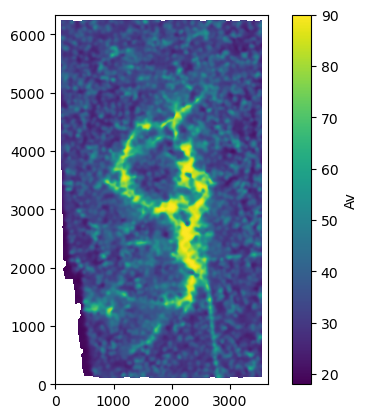

In [32]:
ext_map[ext_map <= 18] = np.nan

im = plt.imshow(ext_map, origin='lower')
plt.colorbar(im, label='Av')

In [7]:
stellar_density_map = ex.make_stellar_density_map()
stellar_density_map[stellar_density_map == 0] = np.nan
stellar_density_map[stellar_density_map > 20] = np.nan

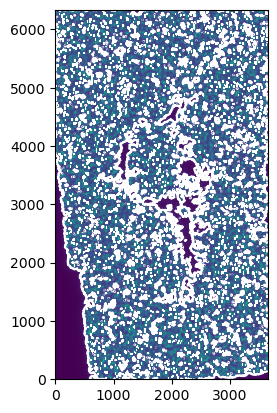

In [8]:
plt.imshow(stellar_density_map, origin='lower', vmin=0, vmax=20)
plt.contour(stellar_density_map, levels=[2.5], colors='white')

In [9]:
separation_map = ex.make_stellar_separation_map()

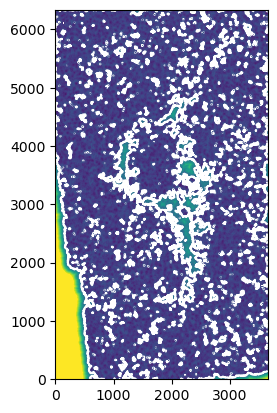

In [10]:
separation_map[separation_map == 0] = np.nan
separation_map[separation_map < 0.1] = np.nan
plt.imshow(separation_map, origin='lower', vmin=0, vmax=5)
plt.contour(stellar_density_map, levels=[2.5], colors='white')

(-0.1822653494996368, 4.0)

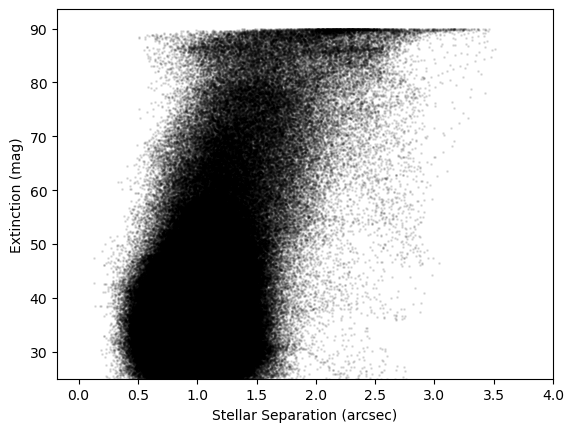

In [36]:
plt.scatter(separation_map[::5,::5].flatten(), ext_map[::5,::5].flatten(), s=1, alpha=0.1, color='k')
plt.xlabel('Stellar Separation (arcsec)')
plt.ylabel('Extinction (mag)')
plt.ylim(bottom=25)
plt.xlim(right=4)

In [37]:
bins_x = np.linspace(0, 4, 100)
bins_y = np.linspace(25, 100, 100)

h,_,__ = np.histogram2d(separation_map[~np.isnan(separation_map)], ext_map[~np.isnan(separation_map)], bins=(bins_x, bins_y))

Text(0, 0.5, 'Extinction (mag)')

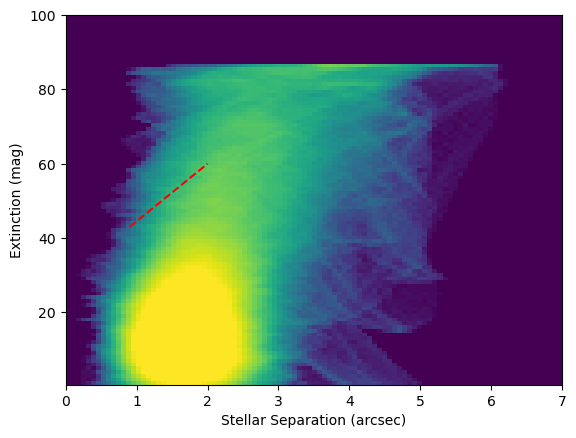

In [38]:
norm = simple_norm(h, 'log', percent=90)
plt.imshow(h.T, origin='lower', aspect='auto', extent=(0, 7, 0.5, 100), norm=norm)
plt.plot([0.9, 2], [43, 60], color='red', linestyle='--')
plt.xlabel('Stellar Separation (arcsec)')
plt.ylabel('Extinction (mag)')